## 1: Basics of Galpy

In [ ]:
# Import all necessary modules
import numpy  
import scipy
import matplotlib.pyplot as plt
import galpy
from galpy.potential import MWPotential2014
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.potential import plotRotcurve

a) Plot the rotation curve of MWPotential2014 out to 40 kpc and its components bulge, disk, and halo.

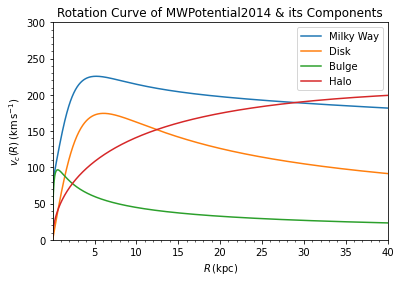

In [71]:
# Make potential instances for Milky Way Galaxy 
mp= MiyamotoNagaiPotential(a=0.5,b=0.0375,normalize=.6) # disk
np= NFWPotential(a=4.5,normalize=.35) # halo
hp= HernquistPotential(a=0.6/8,normalize=0.05) # bulge
mp.turn_physical_on()
np.turn_physical_on()
hp.turn_physical_on()

#plotRotcurve(hp+mp+np,Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2])
#mp= MiyamotoNagaiPotential(amp=5*10**10*units.Msun,a=3.*units.kpc,b=300.*units.pc,ro=9*units.kpc,vo=230.*units.km/units.s)

mw = MWPotential2014
for item in mw:
    item.turn_physical_on()
plotRotcurve(mw, Rrange=[0.01,40.],grid=1001,yrange=[0.,300.], label = 'Milky Way')
mp.plotRotcurve(Rrange=[0.01,40.],grid=1001,overplot=True, label = 'Disk')
hp.plotRotcurve(Rrange=[0.01,40.],grid=1001,overplot=True, label = 'Bulge')
np.plotRotcurve(Rrange=[0.01,40.],grid=1001,overplot=True, label = 'Halo')
plt.legend()
plt.title('Rotation Curve of MWPotential2014 & its Components')
plt.savefig('Q1a.pdf')


b) Integrate the orbit of the Sun in MWPotential2014 for 10 Gyr


8.000027039954302 0.0208


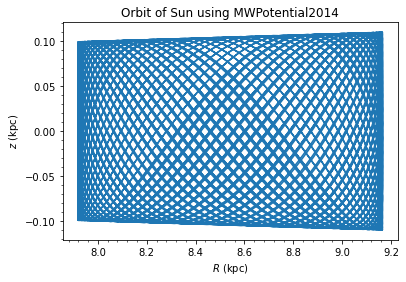

In [72]:
# integrate orbit of Sun for 10 Gyr
from galpy.orbit import Orbit
from astropy import units

sun_orbit = Orbit()
ts = numpy.linspace(0.,10., 10000)*units.Gyr
sun_orbit.integrate(ts,mw,method='odeint')
sun_orbit.plot()
plt.title('Orbit of Sun using MWPotential2014')
plt.plot(sun_orbit.r(), sun_orbit.z(), color = 'red')
print(sun_orbit.r(), sun_orbit.z())
plt.savefig('Q1b.pdf')
plt.show()
plt.close()
#sun_orbit.animate()

c) Using the phase-space coordinates for GD-1 from Webb & Bovy (2019), integrate the orbit of GD-1 forward and backward in time for 50 Myr and plot the orbit in Dec. vs. RA and Distance vs. RA; this is approximately where the GD-1 stream lies on the sky

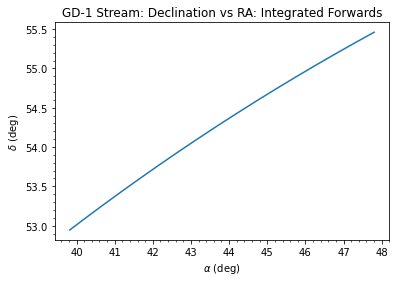

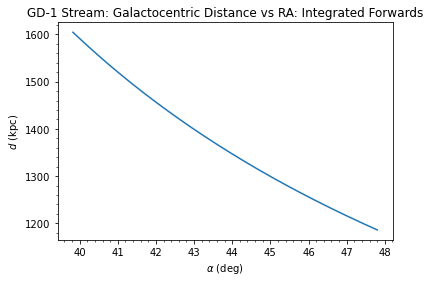

Text(0.5, 1.0, 'GD-1 Stream: Galactocentric Distance vs RA: Integrated Backwards')

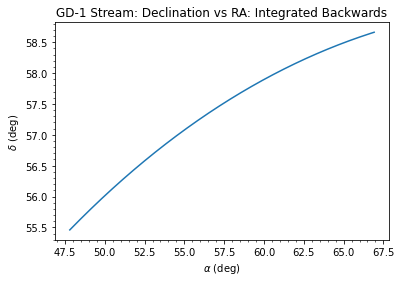

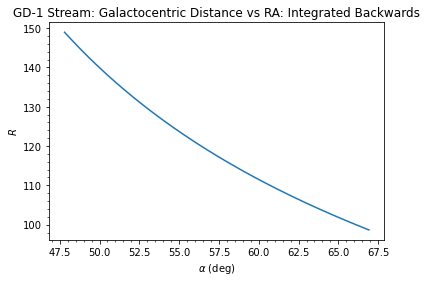

In [6]:
# integrate orbit of GD-1 forward and backwards in time
# Phase space coords: [ra,dec,d,mu_ra, mu_dec,vlos], pass as input to orbit object

ra = 148.9363998668805
dec = 36.15980426805254
d = 7.555339165941959 
mu_ra = -5.332929760383195
mu_dec = -12.198914465325117
vlos = 6.944006091929623 

GD_orbit =  Orbit(vxvv=[ra,dec,d,mu_ra, mu_dec,vlos]) #insert phase space coordinates of GD-1 here

# integrate forward in time
ts_f = numpy.linspace(0.,50., 10000)*units.Myr
GD_orbit.integrate(ts_f,mw)

GD_orbit.plot(d1 = 'ra', d2 = 'dec')
plt.title('GD-1 Stream: Declination vs RA: Integrated Forwards')
plt.savefig('Q1c_1.pdf')
GD_orbit.plot(d1 = 'ra', d2 = 'dist')
plt.title('GD-1 Stream: Galactocentric Distance vs RA: Integrated Forwards')
plt.savefig('Q1c_2.pdf')
plt.show()
plt.close()

# integrate backwards in time
ts_b = numpy.linspace(0.,-50., 10000)*units.Myr
GD_orbit.integrate(ts_b,mw)

GD_orbit.plot(d1 = 'ra', d2 = 'dec')
plt.title('GD-1 Stream: Declination vs RA: Integrated Backwards') 
plt.savefig('Q1c_3.pdf')
GD_orbit.plot(d1 = 'ra', d2 = 'R')
plt.title('GD-1 Stream: Galactocentric Distance vs RA: Integrated Backwards')
plt.savefig('Q1c_4.pdf')

# 2 types of plots: Dec vs RA and Distance vs RA

## 2: Simulating Accretion of Globular Cluster onto MW

a) Integrate the orbits of all of the satellite galaxies of the Milky Way in MWPotential2014 and find their apo- and pericenters (integrate backwards in time). You can load the satellite galaxies with Orbit.from_name(‘MWsatellitegalaxies’). Plot their current spherical Galactocentric radius vs. both peri- and apocenter.

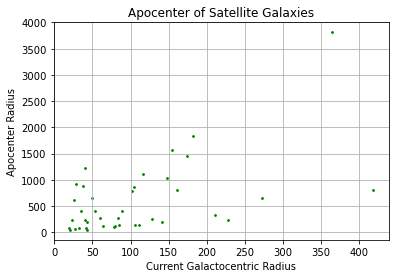

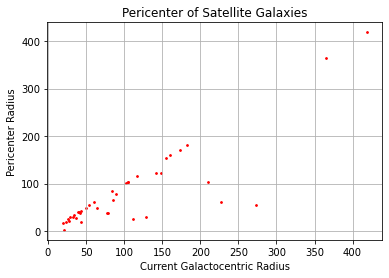

Satellite with smallest pericenter is: TucanaIII with index 35


In [25]:
satellite_g = Orbit.from_name('MWsatellitegalaxies')
ts = numpy.linspace(0., -5., 1000)*units.Gyr
# if you don't specify length then the velocity and distance scale values/
#(ro and vo) are used to calculate 1 distance length in internal units
satellite_g.integrate(ts, mw)

num = len(satellite_g)
peri = numpy.zeros(num)
apo = numpy.zeros(num)
current = numpy.zeros(num) # current spherical galactocentric radius 

i = 0
for item in satellite_g:
    peri[i] = item.rperi()
    apo[i] = item.rap()
    current[i] = item.r()
    i += 1

# Plot current galactocentric radius vs both peri and apocenters \
#of all 40 satellites
# Apocenters:
plt.scatter(current, apo, s = 3.0, color = 'green')
plt.title('Apocenter of Satellite Galaxies')
plt.xlabel('Current Galactocentric Radius')
plt.ylabel('Apocenter Radius')
#plt.legend()
plt.grid()
plt.savefig('Q2a_1.pdf')
plt.show()
plt.close()
# Pericenters:
plt.scatter(current, peri, s = 3.0, color = 'red')
plt.title('Pericenter of Satellite Galaxies')
plt.xlabel('Current Galactocentric Radius')
plt.ylabel('Pericenter Radius')
#plt.legend()
plt.savefig('Q2a_2.pdf')
plt.grid()
plt.show()
plt.close()


'''

satellite_g.plot(d1 = 't', d2 = 'r', label = satellite_g.name)
plt.scatter(numpy.zeros(len(satellite_g)), satellite_g.r())
#plt.legend()

# Find peri and apocenters for each satellite, plot their current galactocentric radius as well as the peri and apocenters of each orbit
#plt.plot(satellite_g.rap())
#plt.plot(satellite_g.rperi())

#print(satellite_g.name)

i=0
for item in satellite_g: 
    item.plot(d1 = 't', d2 = 'r', label = satellite_g.name[i], color = 'orange')
    arr = satellite_g[0].getOrbit()
    plt.scatter(0, item.r(), label= 'current position', color = 'green')
    plt.legend()
    plt.title('Orbit of: '+ satellite_g.name[i])
    plt.show()
    plt.close()
    i += 1
    
'''


# Find index of satellite with smallest pericenter:
smallest = 0
for i in range(len(satellite_g)):
    if satellite_g[i].rperi() < satellite_g[smallest].rperi():
        smallest = i
print('Satellite with smallest pericenter is: ' + satellite_g.name[smallest] + ' with index '+ str(smallest))
    
        

In [24]:
print(satellite_g.name)
print(satellite_g.rperi())

['AquariusII', 'BootesI', 'BootesII', 'CanesVenaticiI', 'CanesVenaticiII', 'Carina', 'CarinaII', 'CarinaIII', 'ComaBerenices', 'CraterII', 'Draco', 'DracoII', 'EridanusII', 'Fornax', 'GrusI', 'Hercules', 'HorologiumI', 'HydraII', 'HydrusI', 'LeoI', 'LeoII', 'LeoIV', 'LeoV', 'LMC', 'PhoenixI', 'PiscesII', 'ReticulumII', 'Sgr', 'Sculptor', 'Segue1', 'Segue2', 'SMC', 'Sextans', 'TriangulumII', 'TucanaII', 'TucanaIII', 'UrsaMajorI', 'UrsaMajorII', 'UrsaMinor', 'Willman1']
[103.91648427  47.86224437  39.72074174 103.80162429 160.60529059
 103.02311619  27.83682627  28.48529687  42.95259653  26.26166514
  37.64739529  19.90574441 364.87901007 121.65509296 116.28700299
  29.49935582  83.47228673 123.17422078  25.68800918  53.90670377
  61.53620216 154.45853943 171.5715423   47.4262291  418.76813979
 181.9540996   28.64852112  16.02841547  64.53838693  20.83760706
  37.26521661  60.28760354  77.87788918  34.58139798  53.79147744
   2.26668997 101.79582187  39.22296198  38.95829961  19.43642363

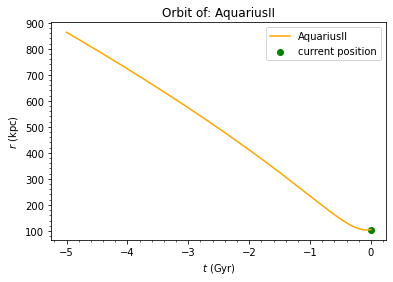

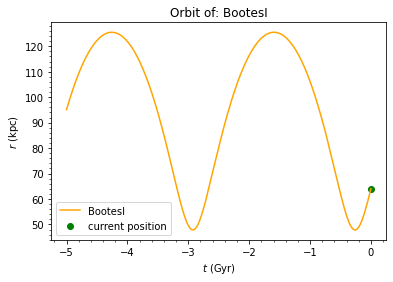

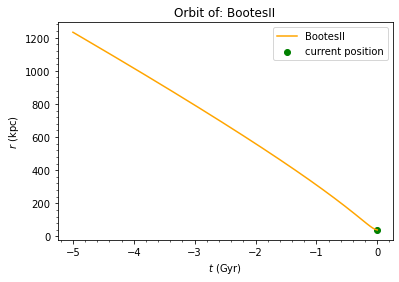

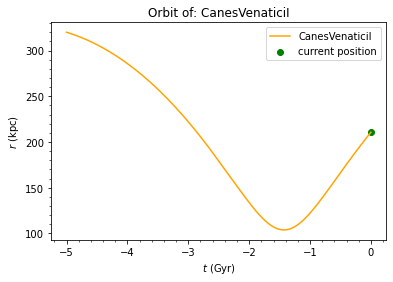

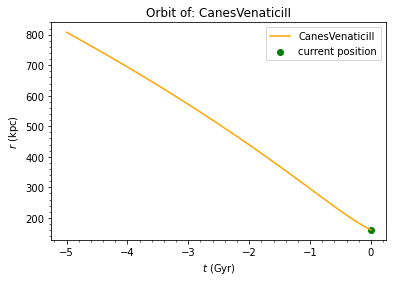

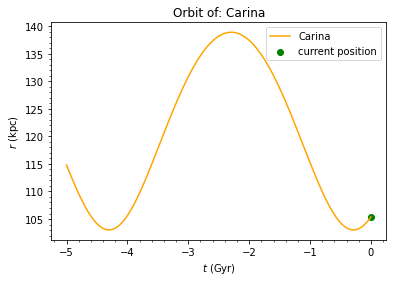

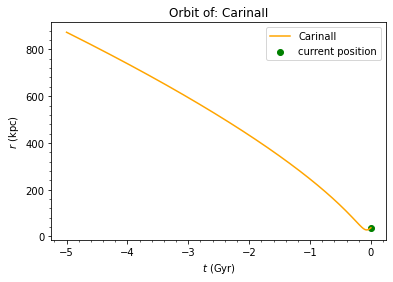

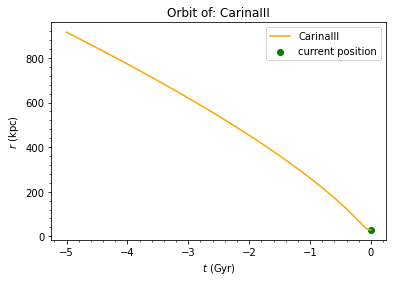

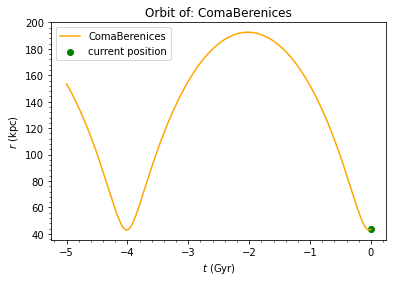

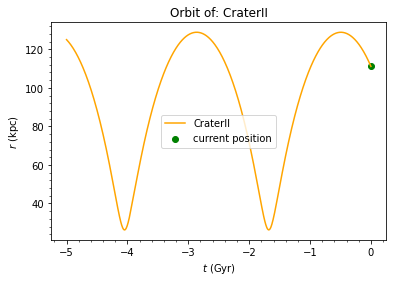

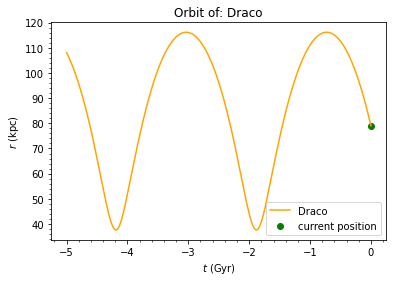

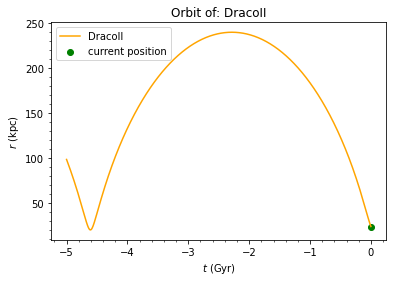

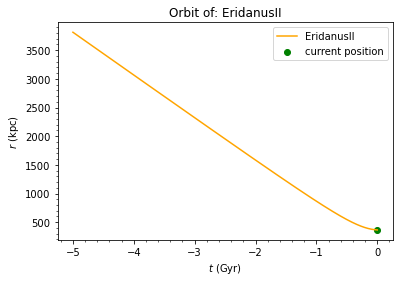

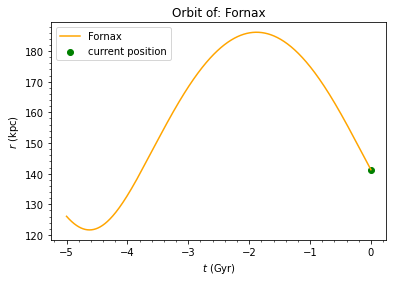

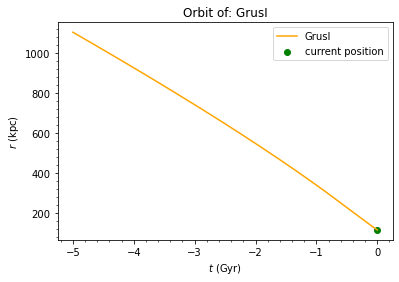

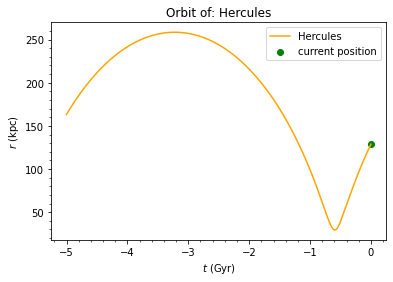

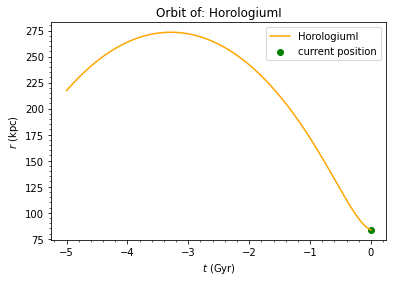

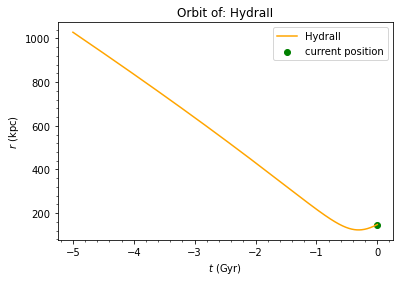

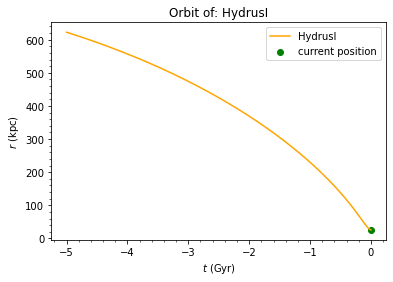

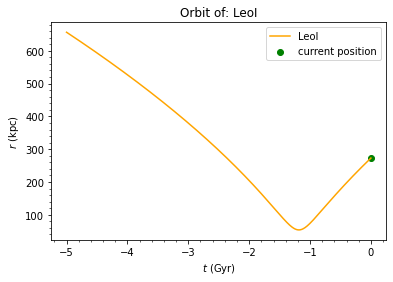

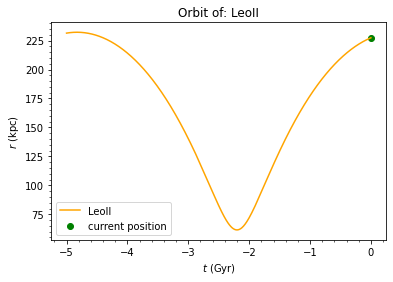

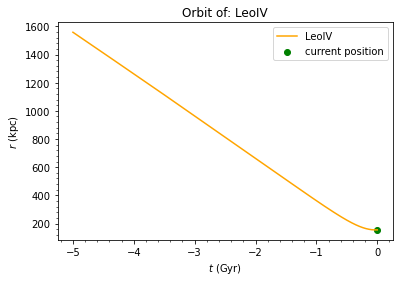

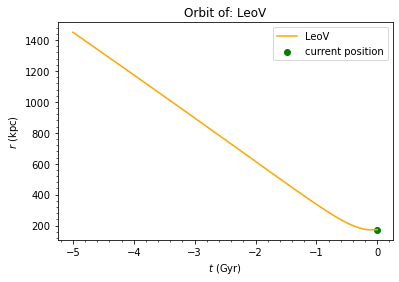

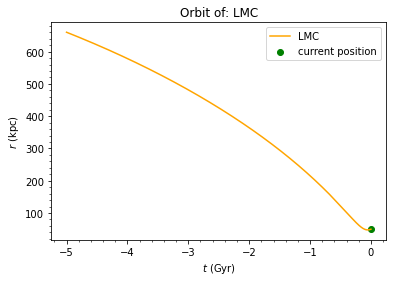

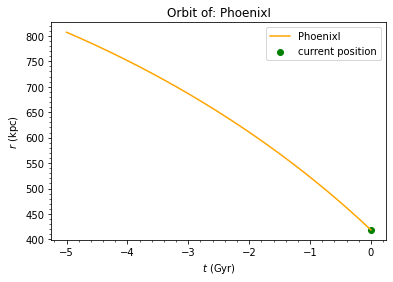

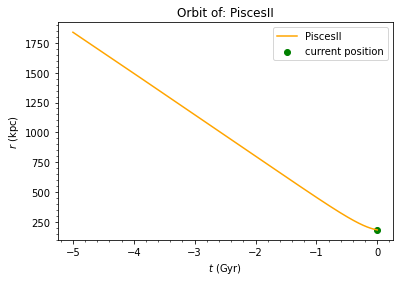

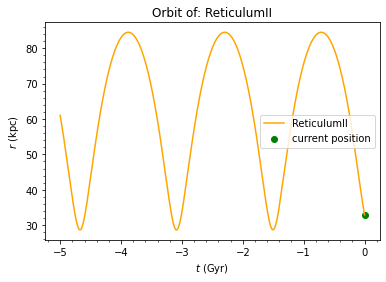

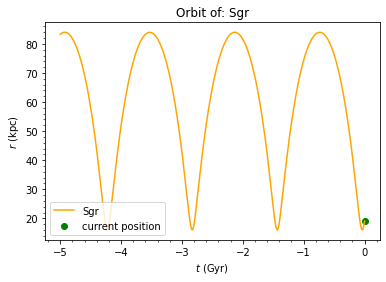

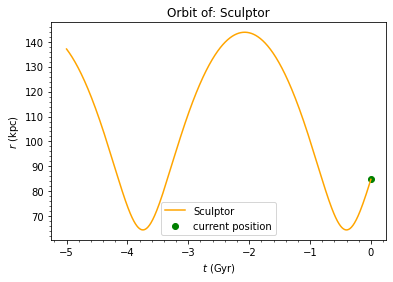

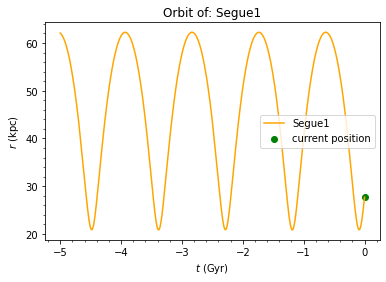

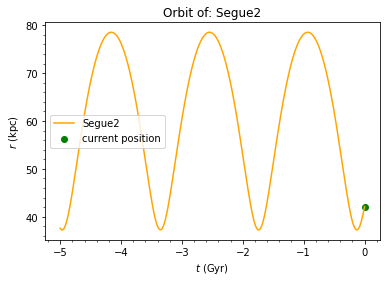

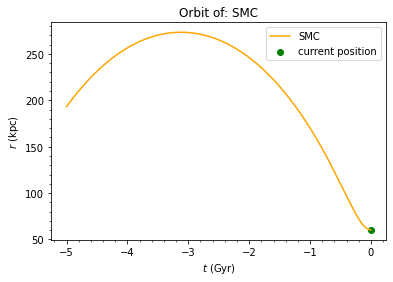

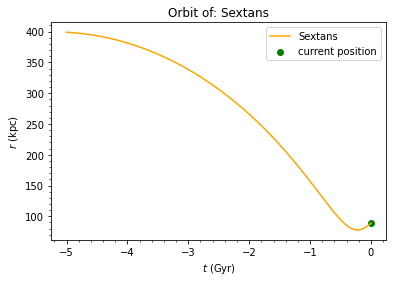

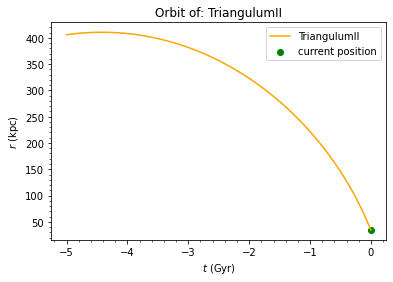

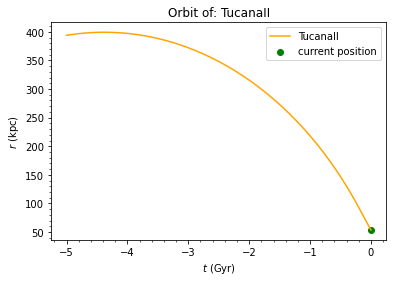

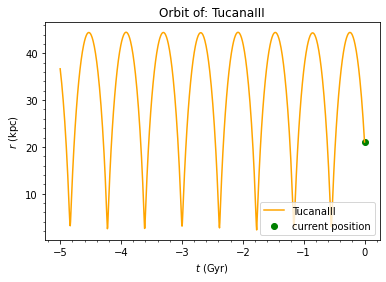

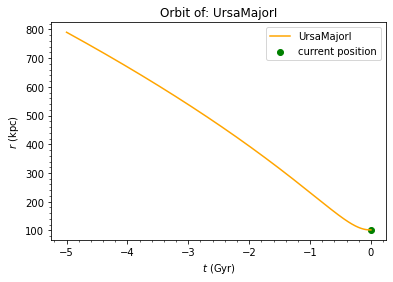

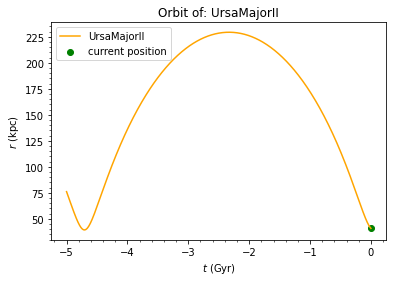

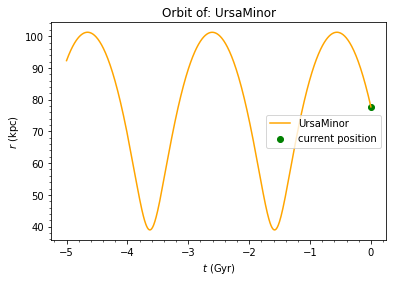

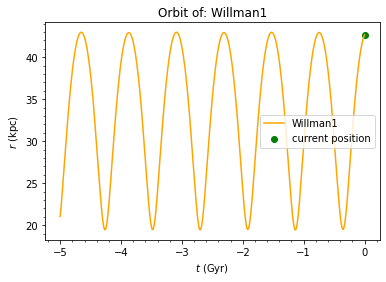

In [26]:
i=0
for item in satellite_g: 
    item.plot(d1 = 't', d2 = 'r', label = satellite_g.name[i], color = 'orange')
    arr = satellite_g[0].getOrbit()
    plt.scatter(0, item.r(), label= 'current position', color = 'green')
    plt.legend()
    plt.title('Orbit of: '+ satellite_g.name[i])
    plt.show()
    plt.close()
    i += 1

b) For the satellite with the smallest pericenter, find the time at which it reaches the smallest radius.

The time at which satellite galaxy TucanaIII reaches its smallest radius is: -0.17517517517517517


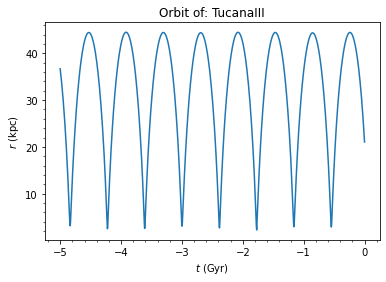

In [64]:
# Satellite galaxy with smallest pericenter is: TucanaIII with index 35 
# Time at which satellite reaches its smallest radius is at perihelion 
satellite_g[smallest].plot(d1 = 't', d2 = 'r')
plt.title('Orbit of: '+ satellite_g.name[smallest])
name_smallest = satellite_g.name[smallest] 

time = satellite_g.time()
#print(time)
print('The time at which satellite galaxy ' + name_smallest + ' reaches its smallest radius is: '  + str(time[smallest]))

# NOT RIGHT NEED TO FIX THIS !!!!!!!!!

c) Give the satellite a mass (e.g., 10^11 Msun) and size following a=1.05 (Msat/10^8/Msun)^0.5 kpc and integrate backwards in time for t=10 Gyr, including the effect of dynamical friction. Plot the orbit of the satellite as radius vs. time. The satellite should be at progressively larger radii at earlier and earlier times.

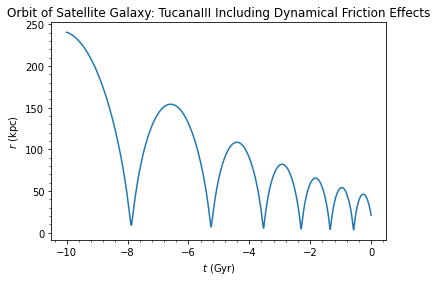

In [76]:
from galpy.potential import ChandrasekharDynamicalFrictionForce

Tuc_satellite = satellite_g[smallest]() #make copy of orbit instance 

Msat = 10.**11.*units.Msun
size = 1.05*(Msat/(10.**8./1*units.Msun))**0.5*units.kpc
cdf= ChandrasekharDynamicalFrictionForce(GMs=Msat, rhm = size ,dens=MWPotential2014)
ts = numpy.linspace(0.,-10.,1000)*units.Gyr
Tuc_satellite.integrate(ts, mw+cdf)
Tuc_satellite.plot(d1 = 't', d2 = 'r')
plt.title('Orbit of Satellite Galaxy: '+ name_smallest + ' Including Dynamical Friction Effects' )
plt.savefig('Q2c.pdf')


d)  Modeling the satellite as a Hernquist potential with scale radius a=1.05 (Msat/10^8/Msun)^0.5 kpc, initialize a star cluster on a circular orbit at r= 4 kpc within  the satellite. Then move the satellite+cluster system to the radius of the satellite at t=10 Gyr from the previous question.


In [ ]:
# initialize star cluster on orbit within satellite
sat = HernquistPotential(a = size)
cluster = Orbit()

e) Integrate the orbit of the star cluster in the combined satellite + MWPotential2014, by representing the potential of the dwarf as a MovingObjectPotential. You should set up the MovingObjectPotential with the orbit of the satellite from c, using the HernquistPotential as the mass model for the satellite. Then integrate the cluster that you initialized in d) in MWPotential2014+the MovingObjectPotential for 12 Gyr. Plot the orbit of both the satellite and the cluster in radius vs. time. Describe what happens.

f) Bonus: Wrap the MovingObjectPotential with a DehnenSmoothWrapperPotential to make its mass go to zero at 10 Gyr (when the satellite should be at its pericenter); look at the orbit of the cluster again and see how it differs from what happens in e).

https://docs.galpy.org/en/v1.6.0/potential.html#initializing-potentials-with-parameters-with-units